# Newton's Method for root finding

In [27]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

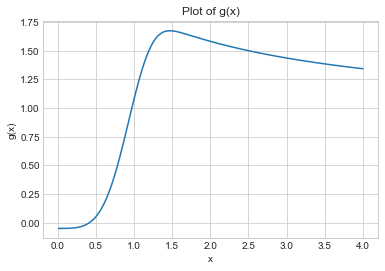

In [28]:
# Newton's Method for root finding in 1D
# Problem: find root of g
def g(x):
    return 1.95 - np.exp(-2/x) - 2*np.exp(-np.power(x,4))
    
x = np.linspace(0.01,4.0,400)

plt.plot(x,g(x))
plt.title('Plot of g(x)')
plt.xlabel('x')
plt.ylabel("g(x)")

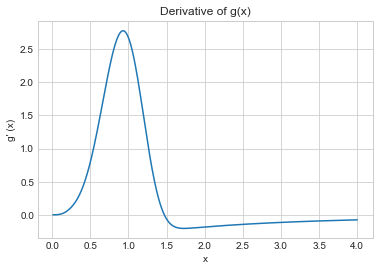

In [29]:
# gd: Derivative of g
def gd(x):
    return -2*np.power(x,-2)*np.exp(-2/x) + 8*np.power(x,3)*np.exp(-np.power(x,4))

plt.plot(x,gd(x))
plt.title('Derivative of g(x)')
plt.xlabel('x')
plt.ylabel("g' (x)")

In [31]:
# newton's update for root of x
# functions are first class objects in python
# Searches nearest optima: x0>1.4 searches on the right of peak
def newton_update(x0,g,gd):
    return x0 - g(x0)/gd(x0)


In [32]:
x0 = 1.0
condition = True
while condition:   
    x1 = newton_update(x0,g,gd)
    condition = np.abs(x0-x1) >= 0.001
    x0 = x1
    print('x =',x0)


x = 0.596273020564
x = 0.478748981788
x = 0.425797517133
x = 0.414627912436
x = 0.4141765654


# Newton's method for optimization 
##### Move towards minima/downhill (opposite to direction of slope of gd NOT g) to find root of gd, hence - sign.
##### Finds closest optimum value: maxima or minima

In [33]:
# Newton's Method for optimization
# Problem: find maxima of g
# Searches nearest optima: x0<0.89 searches on the left of gd peak (minima at 0)
# x0 > 0.89 takes to inf
# Need step size modifications
def gdd(x):
    return 4*np.power(x,-3)*np.exp(-2/x)-4*np.power(x,-4)*np.exp(-2/x)+24*np.power(x,2)*np.exp(-np.power(x,4))-32*np.power(x,6)*np.exp(-np.power(x,4))

In [17]:
x0 = 1.0
condition = True
loops = 1
max_iter = 20
while condition and loops<max_iter:   
    x1 = newton_update(x0,gd,gdd)
    loops += 1
    condition = np.abs(x0-x1) >= 0.001 
    x0 = x1
    print('x =',x0)
    

if loops == max_iter:
    print('Solution failed to converge. Try another starting value!')

x = 1.90803013971
x = 3.96640484492
x = 6.6181614689
x = 10.5162392894
x = 16.3269006983
x = 25.0229734288
x = 38.0552735534
x = 57.5964036862
x = 86.9034400129
x = 130.860980508
x = 196.795321033
x = 295.695535237
x = 444.044999522
x = 666.568627836
x = 1000.35369299
x = 1501.03103981
x = 2252.04689304
x = 3378.57056168
x = 5068.35599056
Solution failed to converge. Try another starting value!


# Gradient Ascent with step halving
##### Works on slope of g (Newton's works on slope of gd): so + for maxima, - for minima vs direction of slope

In [34]:
# Gradient Ascent with step halving
# for maxima
def grad_ascent_update(x0,g,gd):
    rate = 1.0
    while g(x0 + rate*gd(x0)) < g(x0):
        rate = rate/2    
    return x0 + rate*gd(x0)
# for minima
def grad_descent_update(x0,g,gd):
    rate = 1.0
    while g(x0 - rate*gd(x0)) > g(x0):
        rate = rate/2    
    return x0 - rate*gd(x0)

In [35]:
x0 = 3.0
condition = True
loops = 1
max_iter = 40
while condition and loops<max_iter: 
    x1 = grad_ascent_update(x0,g,gd)
    loops += 1
    condition = np.abs(x0-x1) >= 0.001 
    x0 = x1
    print('x =',x0)
    
if loops == max_iter:
    print('Solution failed to converge. Try another starting value!')

x = 2.88590730688
x = 2.76582218689
x = 2.63895835983
x = 2.50436486087
x = 2.3608804387
x = 2.20707450457
x = 2.04117375203
x = 1.8609835223
x = 1.66414688865
x = 1.46423731415
x = 1.47187067602
x = 1.47004365212
x = 1.47042593344


# Symbolic differentiation with sympy and lambdify

In [36]:
import sympy as sp
x = sp.symbols('x',real=True)             # define x as a mathematical symbol
f_expr = 1.95 - sp.exp(-2/x) - 2*sp.exp(-x**4)            # symbolic expression for f(x)

In [37]:
dfdx_expr = sp.diff(f_expr, x)  # compute f'(x) symbolically
ddfdx_expr = sp.diff(dfdx_expr, x)  # compute f''(x) symbolically
print(dfdx_expr)
print(ddfdx_expr)

8*x**3*exp(-x**4) - 2*exp(-2/x)/x**2
-32*x**6*exp(-x**4) + 24*x**2*exp(-x**4) + 4*exp(-2/x)/x**3 - 4*exp(-2/x)/x**4


In [38]:
# Turn f_expr and dfdx_expr into plain Python functions
f = sp.lambdify([x],     # argument to f
             f_expr,"numpy")  # symbolic expression to be evaluated
dfdx = sp.lambdify([x], dfdx_expr,"numpy")
ddfdx = sp.lambdify([x], ddfdx_expr,"numpy")

# Gradient Ascent with sympy output

In [39]:
x0 = 3.0
condition = True
loops = 1
max_iter = 40
while condition and loops<max_iter: 
    x1 = grad_ascent_update(x0,f,dfdx)
    loops += 1
    condition = np.abs(x0-x1) >= 0.001 
    x0 = x1
    print('x =',x0)
    
if loops == max_iter:
    print('Solution failed to converge. Try another starting value!')

x = 2.88590730688
x = 2.76582218689
x = 2.63895835983
x = 2.50436486087
x = 2.3608804387
x = 2.20707450457
x = 2.04117375203
x = 1.8609835223
x = 1.66414688865
x = 1.46423731415
x = 1.47187067602
x = 1.47004365212
x = 1.47042593344


# Newton's method with sympy output

In [40]:
x0 = 1.0
condition = True
loops = 1
max_iter = 20
while condition and loops<max_iter:   
    x1 = newton_update(x0,dfdx,ddfdx)
    loops += 1
    condition = np.abs(x0-x1) >= 0.001 
    x0 = x1
    print('x =',x0)
    

if loops == max_iter:
    print('Solution failed to converge. Try another starting value!')

x = 1.90803013971
x = 3.96640484492
x = 6.6181614689
x = 10.5162392894
x = 16.3269006983
x = 25.0229734288
x = 38.0552735534
x = 57.5964036862
x = 86.9034400129
x = 130.860980508
x = 196.795321033
x = 295.695535237
x = 444.044999522
x = 666.568627836
x = 1000.35369299
x = 1501.03103981
x = 2252.04689304
x = 3378.57056168
x = 5068.35599056
Solution failed to converge. Try another starting value!


# Newton's method with step halving

In [44]:
# Overshoot
# Newton's method with step halving
# If sign of g changes, you missed the root
# Finds nearest optima
def newton_update2(x0,g,gd):
    rate = 1.0
    while np.sign(g(x0 - rate*g(x0)/gd(x0))) != np.sign(g(x0)):
        rate = rate/2
    return x0 - rate*g(x0)/gd(x0)

In [43]:
x0 = 0.4
condition = True
loops = 1
max_iter = 20
while condition and loops<max_iter:   
    x1 = newton_update2(x0,dfdx,ddfdx)
    loops += 1
    condition = np.abs(x0-x1) >= 0.001 
    x0 = x1
    print('x =',x0)
    

if loops == max_iter:
    print('Solution failed to converge. Try another starting value!')

x = 0.260957083566
x = 0.164015819361
x = 0.107836500045
x = 0.0718599494863
x = 0.0479057618708
x = 0.0319370624407
x = 0.0212913601935
x = 0.0141942381844
x = 0.00946282520016
x = 0.00630855009972
x = 0.00420570006204
x = 0.00280380004077
x = 0.00186920002711


# Newton's method with step halving for maxima

In [45]:
def newton_update3(x0,g,gd):
    rate = 1.0
    # choose uphill direction
    if gd(x0) > 0:
        rate = -rate
    while np.sign(g(x0 - rate*g(x0)/gd(x0))) != np.sign(g(x0)):
        rate = rate/2
    return x0 - rate*g(x0)/gd(x0)

In [47]:
x0 = 0.4
condition = True
loops = 1
max_iter = 20
while condition and loops<max_iter:   
    x1 = newton_update3(x0,dfdx,ddfdx)
    loops += 1
    condition = np.abs(x0-x1) >= 0.001 
    x0 = x1
    print('x =',x0)
    

if loops == max_iter:
    print('Solution failed to converge. Try another starting value!')

x = 0.539042916434
x = 0.72982880057
x = 1.09566081388
x = 1.45168190867
x = 1.46902307749
x = 1.47035027468
x = 1.47035776597
